In [1]:
!pip install torch==1.12.1+cu102 torchvision==0.13.1+cu102 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu102
!pip install numpy==1.23.3 pandas triton matplotlib

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu102
     |█████████████                   | 317.8 MB 113.6 MB/s eta 0:00:05

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████████████████▋     | 646.0 MB 146.5 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |███████████████████████████████▌| 765.4 MB 148.6 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 776.4 MB 23 kB/s 
     |████████████████████████████████| 19.1 MB 14 kB/s s eta 0:00:01
     |████████████████████████████████| 3.7 MB 48.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 23.2 MB/s eta 0:00:01
     |████████████████████████████████| 17.1 MB 23.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 99.3 MB/s eta 0:00:01
     |██████████████████████████████▏ | 238.4 MB 122.9 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 8.3 MB 98.3 MB/s 
     |████████████████████████████████| 347 kB 124.4 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 104.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 62.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 74.1 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 127.6 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1


In [2]:
import torch
import triton
import triton.language as tl
import triton.testing

In [5]:
# 逐块求结果矩阵(分组)
@triton.autotune(
    configs=[
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':64,'BLOCK_SIZE_N':64,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=5,num_warps=8),

triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':8},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':8},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':8},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':8},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':8},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':8},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':6},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':6},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':6},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':6},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':6},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':6},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':4},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':4},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':4},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':4},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':4},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':4},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':2},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':2},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':2},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':2},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':2},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':2},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':1},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':1},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':1},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':1},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':1},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':32,'GROUP_SIZE_M':1},num_stages=5,num_warps=8),

triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':8},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':8},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':8},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':8},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':8},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':8},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':6},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':4},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':2},num_stages=5,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=3,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=3,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=4,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=4,num_warps=8),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=5,num_warps=4),
triton.Config({'BLOCK_SIZE_M':128,'BLOCK_SIZE_N':128,'BLOCK_SIZE_K':64,'GROUP_SIZE_M':1},num_stages=5,num_warps=8),

    ],
    key=['M','N','K'],
)

@triton.jit
def matmul_kernel(
      a_ptr, b_ptr, c_ptr,
      M, N, K,
      stride_am, stride_ak,
      stride_bk, stride_bn,
      stride_cm, stride_cn,
      BLOCK_SIZE_M:tl.constexpr, BLOCK_SIZE_N:tl.constexpr, BLOCK_SIZE_K:tl.constexpr, GROUP_SIZE_M:tl.constexpr
      ):
  # program <-> one block of matrix c <-> pid_m, pid_n, BLOCK_SIZE_M, BLOCK_SIZE_N
  pid = tl.program_id(axis=0)
  # how many blocks in m and n ?
  num_pid_m = tl.cdiv(M,BLOCK_SIZE_M)
  num_pid_n = tl.cdiv(N,BLOCK_SIZE_N)
  # how many blocks in a group ?
  num_pid_in_group = GROUP_SIZE_M * num_pid_n
  # which group current program exists in ?
  group_id = pid // num_pid_in_group
  # start of the group ?
  first_pid_m = group_id * GROUP_SIZE_M
  # if the number of blocks in m isn't divisible by GROUP_SIZE_M, then the last group has not GROUP_SIZE_M lines
  group_size_m = min(num_pid_m - first_pid_m, GROUP_SIZE_M)
  # the idx of block in group
  pid_in_group = pid % num_pid_in_group
  # pid_m
  pid_m = first_pid_m + pid_in_group % group_size_m
  # pid_n
  pid_n = pid_in_group // group_size_m

  tl.assume(pid_m>=0)
  tl.assume(pid_n>=0)
  tl.assume(stride_am>0)
  tl.assume(stride_ak>0)
  tl.assume(stride_bk>0)
  tl.assume(stride_bn>0)
  tl.assume(stride_cm>0)
  tl.assume(stride_cn>0)

  # element in block
  offs_am = (pid_m*BLOCK_SIZE_M + tl.arange(0,BLOCK_SIZE_M))%M
  offs_bn = (pid_n*BLOCK_SIZE_N + tl.arange(0,BLOCK_SIZE_N))%N
  offs_k = tl.arange(0,BLOCK_SIZE_K)
  a_ptrs = a_ptr + (offs_am[:,None]*stride_am + offs_k[None,:]*stride_ak)
  b_ptrs = b_ptr + (offs_k[:,None]*stride_bk + offs_bn[None,:]*stride_bn)

  # do the multiply
  accumulator = tl.zeros((BLOCK_SIZE_M,BLOCK_SIZE_N),dtype=tl.float32)
  for k in range(0,tl.cdiv(K,BLOCK_SIZE_K)):
    a=tl.load(a_ptrs, mask=offs_k[None,:]<K-k*BLOCK_SIZE_K,other=0.0)
    b=tl.load(b_ptrs, mask=offs_k[:,None]<K-k*BLOCK_SIZE_K,other=0.0)
    accumulator = tl.dot(a,b, accumulator)
    a_ptrs+=BLOCK_SIZE_K*stride_ak
    b_ptrs+=BLOCK_SIZE_K*stride_bk
  c = accumulator.to(tl.float16)

  # write the result in c
  offs_cm = pid_m * BLOCK_SIZE_M + tl.arange(0,BLOCK_SIZE_M)
  offs_cn = pid_n * BLOCK_SIZE_N + tl.arange(0,BLOCK_SIZE_N)
  c_ptrs = c_ptr+stride_cm*offs_cm[:,None] + stride_cn * offs_cn[None,:]
  c_mask =(offs_cm[:,None]<M)&(offs_cn[None,:]<N)
  tl.store(c_ptrs, c, mask=c_mask)

_printed_configs = {}

def matmul(a, b):
  assert a.shape[1] == b.shape[0], "Incompatible dimensions"
  assert a.is_contiguous(), "Matrix A bust be contiguous"
  M, K = a.shape
  K, N = b.shape
  shape_key = (M, N, K)
  c = torch.empty((M,N),device=a.device, dtype=torch.float16)
  grid = lambda META: (triton.cdiv(M, META['BLOCK_SIZE_M'])*triton.cdiv(N, META['BLOCK_SIZE_N']),)
  matmul_kernel[grid](a,b,c,M,N,K,a.stride(0),a.stride(1),b.stride(0),b.stride(1),c.stride(0),c.stride(1))
  if hasattr(matmul_kernel, 'best_config') and shape_key not in _printed_configs:
    print(f"Best config selected by autotune for M={M}, N={N}, K={K}:")
    print(matmul_kernel.best_config)
    _printed_configs[shape_key] = True
  elif not hasattr(matmul_kernel, 'best_config') and shape_key not in _printed_configs:
    print("No best config found yet.")
    _printed_configs[shape_key] = True
  return c

Best config selected by autotune for M=256, N=256, K=256:
BLOCK_SIZE_M: 64, BLOCK_SIZE_N: 64, BLOCK_SIZE_K: 64, GROUP_SIZE_M: 1, num_warps: 4, num_ctas: 1, num_stages: 5, num_buffers_warp_spec: 0, num_consumer_groups: 0, reg_dec_producer: 0, reg_inc_consumer: 0, maxnreg: None
Best config selected by autotune for M=384, N=384, K=384:
BLOCK_SIZE_M: 64, BLOCK_SIZE_N: 64, BLOCK_SIZE_K: 64, GROUP_SIZE_M: 2, num_warps: 8, num_ctas: 1, num_stages: 4, num_buffers_warp_spec: 0, num_consumer_groups: 0, reg_dec_producer: 0, reg_inc_consumer: 0, maxnreg: None
Best config selected by autotune for M=512, N=512, K=512:
BLOCK_SIZE_M: 64, BLOCK_SIZE_N: 64, BLOCK_SIZE_K: 64, GROUP_SIZE_M: 4, num_warps: 4, num_ctas: 1, num_stages: 3, num_buffers_warp_spec: 0, num_consumer_groups: 0, reg_dec_producer: 0, reg_inc_consumer: 0, maxnreg: None
Best config selected by autotune for M=640, N=640, K=640:
BLOCK_SIZE_M: 64, BLOCK_SIZE_N: 64, BLOCK_SIZE_K: 64, GROUP_SIZE_M: 6, num_warps: 4, num_ctas: 1, num_stages: 5

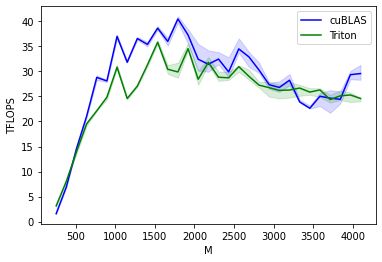

matmul-performance-fp16:
         M       N       K     cuBLAS     Triton
0    256.0   256.0   256.0   1.583952   3.144156
1    384.0   384.0   384.0   6.912000   8.043054
2    512.0   512.0   512.0  14.563555  13.934565
3    640.0   640.0   640.0  21.032093  19.528010
4    768.0   768.0   768.0  28.801171  22.135694
5    896.0   896.0   896.0  28.098561  24.852236
6   1024.0  1024.0  1024.0  36.994964  30.840470
7   1152.0  1152.0  1152.0  31.829276  24.582322
8   1280.0  1280.0  1280.0  36.571428  27.069805
9   1408.0  1408.0  1408.0  35.401144  31.332046
10  1536.0  1536.0  1536.0  38.643987  35.826069
11  1664.0  1664.0  1664.0  35.995646  30.430644
12  1792.0  1792.0  1792.0  40.484194  29.892084
13  1920.0  1920.0  1920.0  37.278724  34.549204
14  2048.0  2048.0  2048.0  32.427573  28.434452
15  2176.0  2176.0  2176.0  31.440130  31.814473
16  2304.0  2304.0  2304.0  32.465308  28.841380
17  2432.0  2432.0  2432.0  29.905624  28.719564
18  2560.0  2560.0  2560.0  34.494334  30.95

In [6]:
DEVICE = 'cuda'

ref_lib = 'cuBLAS'

configs = [
    triton.testing.Benchmark(
        x_names=["M", "N", "K"],
        x_vals=[128 * i for i in range(2, 33)],  # 从 64 到 1024
        line_arg="provider",
        line_vals=[ref_lib.lower(), "triton"],
        line_names=[ref_lib, "Triton"],
        styles=[("blue", "-"), ("green", "-")],
        ylabel="TFLOPS",
        plot_name="matmul-performance-fp16",
        args={},
    )
]

@triton.testing.perf_report(configs)
def benchmark(M, N, K, provider):
    a = torch.randn((M, K), device=DEVICE, dtype=torch.float16)
    b = torch.randn((K, N), device=DEVICE, dtype=torch.float16)

    quantiles = [0.5, 0.2, 0.8]
    if provider == ref_lib.lower():
        ms, min_ms, max_ms = triton.testing.do_bench(lambda: torch.matmul(a, b), quantiles=quantiles)
    if provider == 'triton':
        ms, min_ms, max_ms = triton.testing.do_bench(lambda: matmul(a, b), quantiles=quantiles)

    perf = lambda ms: 2 * M * N * K * 1e-12 / (ms * 1e-3)
    return perf(ms), perf(max_ms), perf(min_ms)

benchmark.run(show_plots=True, print_data=True)

